## → Diccionario de Datos:

- ##### *Contenido_de_Nitrogeno:* Proporción de contenido de nitrógeno en el suelo.
- ##### *Contenido_de_Fosforo:* Proporción de contenido de fósforo en el suelo.
- ##### *Contenido_de_Potasio:* Proporción de contenido de potasio en el suelo.
- ##### *Temperatura_C:* Temperatura en grados Celsius.
- ##### *Humedad_Relativa:* Humedad relativa en porcentaje.
- ##### *Nivel_de_pH:* Nivel de pH del suelo.
- ##### *Precipitacion_mm:* Cantidad de precipitación en milímetros.
- ##### *Tipo_de_Cultivo:* Tipo de cultivo recomendado en función de los parámetros anteriores.


#### El uso de Machine Learning en la agricultura es vital para optimizar rendimientos, mejorar la sostenibilidad y minimizar riesgos. Esto es particularmente relevante en Argentina, donde la agricultura es un pilar económico. Saber qué tipo de cultivo es más adecuado para ciertas condiciones del suelo y del clima puede tener un impacto significativo en la productividad y la sostenibilidad.

## → a. Análisis Exploratorio de Datos (EDA)
#### Para realizar un EDA exhaustivo del dataset, considere las siguientes preguntas:
#### ¿Cómo se distribuyen los valores en cada una de las variables?
#### ¿Existen correlaciones entre las diferentes variables del suelo y los tipos de cultivos?
#### ¿Cómo varía la recomendación de cultivo según las condiciones del suelo y el clima?
#### ¿Existen valores atípicos o faltantes que deban ser tratados?

## → b. Machine Learning

#### En esta sección, implementaremos dos modelos de Machine Learning para predecir el Tipo_de_Cultivo basándonos en las variables del suelo y del clima. Utilizaremos una Regresión Logística y un Árbol de Decisión. 

#### Consigna para la Implementación del Código: Utilice el siguiente código de Python como base para implementar el modelo de Árbol de Decisión:

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
# Crear el modelo
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=2,
max_depth=5)
# Validación cruzada
score = cross_val_score(decision_tree_model, features, target, cv=5)
print('Puntuación de validación cruzada:', score)
# Precisión en entrenamiento
dt_train_accuracy = decision_tree_model.score(x_train, y_train)
print("Precisión en entrenamiento =", dt_train_accuracy)
# Precisión en pruebas
dt_test_accuracy = decision_tree_model.score(x_test, y_test)
print("Precisión en pruebas =", dt_test_accuracy)
# Matriz de confusión
y_pred = decision_tree_model.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_true, y_pred)
# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()
```


#### Interprete que significa la diagonal y los desvios de la diagonal. Cual cultivo se confunde mas el algoritmo?


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_cultivos= pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/tp_datos/4-cultivo/tipo_cultivo.csv")
df_cultivos.head()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [17]:
df_cultivos = df_cultivos.copy()

In [18]:
df_cultivos.columns

Index(['Unnamed: 0', 'Contenido_de_Nitrogeno', 'Contenido_de_Fosforo',
       'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa',
       'Nivel_de_pH', 'Precipitacion_mm', 'Tipo_de_Cultivo'],
      dtype='object')

___

## ***a. Análisis Exploratorio de Datos (EDA)***
#### Para realizar un EDA exhaustivo del dataset, considere las siguientes preguntas:
#### ¿Cómo se distribuyen los valores en cada una de las variables?
#### ¿Existen correlaciones entre las diferentes variables del suelo y los tipos de cultivos?
#### ¿Cómo varía la recomendación de cultivo según las condiciones del suelo y el clima?
#### ¿Existen valores atípicos o faltantes que deban ser tratados?

## → Validación de la data

In [19]:
df_cultivos.rename(columns=lambda x: x.strip(), inplace=True) # Remuevo espacios de las columnas.

In [20]:
print("El dataset tiene " + str(df_cultivos.shape[0])+ " filas.")
print("El dataset tiene " + str(df_cultivos.shape[1])+ " columnas.")

El dataset tiene 2200 filas.
El dataset tiene 9 columnas.


In [21]:
from funciones.exploratory_data_analysis import validate_columns 
validate_columns(df_cultivos)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
Unnamed: 0,NaN,2200.0,0,0.0,"[1010, 1620, 663, 60, 2102]"
Contenido_de_Nitrogeno,NaN,2200.0,0,0.0,"[118, 4, 9, 72, 83]"
Contenido_de_Fosforo,NaN,2200.0,0,0.0,"[88, 13, 48, 40, 38]"
Contenido_de_Potasio,NaN,2200.0,0,0.0,"[52, 6, 22, 38, 35]"
Temperatura_C,NaN,2200.0,0,0.0,"[28.65003945, 15.63211033, 27.77076285, 20.414..."
Humedad_Relativa,NaN,2200.0,0,0.0,"[82.68752542, 94.25966183, 87.09979549, 82.208..."
Nivel_de_pH,NaN,2200.0,0,0.0,"[5.8431631610000005, 7.5611432239999985, 6.402..."
Precipitacion_mm,NaN,2200.0,0,0.0,"[98.75084366, 101.4705704, 49.50812624, 245.15..."
Tipo_de_Cultivo,22,2200,0,0.0,"[banana, orange, mungbean, rice, coffee]"


In [22]:
df_cultivos.describe()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,1099.500000,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,635.229617,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,549.750000,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,1099.500000,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,1649.250000,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,2199.000000,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


___

## →  Veo los tipos de datos con dtypes

In [23]:
df_cultivos.dtypes

Unnamed: 0                  int64
Contenido_de_Nitrogeno      int64
Contenido_de_Fosforo        int64
Contenido_de_Potasio        int64
Temperatura_C             float64
Humedad_Relativa          float64
Nivel_de_pH               float64
Precipitacion_mm          float64
Tipo_de_Cultivo            object
dtype: object

___

## → Valores outliers

In [24]:
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Cargar el archivo CSV en un DataFrame
#df_cultivos = pd.read_csv("ruta/al/archivo.csv")

# Crear el codificador One Hot
ohe = OneHotEncoder(sparse=False)

# Ajustar el codificador One Hot a la columna "Tipo_de_Cultivo"
ohe.fit(df_cultivos[["Tipo_de_Cultivo"]])

# Codificar la columna "Tipo_de_Cultivo"
tipo_cultivo_encoded = ohe.transform(df_cultivos[["Tipo_de_Cultivo"]])

# Obtener los nombres de las categorías
categorias = ohe.categories_[0]

# Crear los nombres de las columnas codificadas
nombres_columnas = [f"{categoria}_encoded" for categoria in categorias]

# Crear un DataFrame a partir de las columnas codificadas
df_tipo_cultivo_encoded = pd.DataFrame(tipo_cultivo_encoded, columns=nombres_columnas)

# Concatenar el DataFrame original con el DataFrame de las columnas codificadas
df_cultivos_encoded = pd.concat([df_cultivos, df_tipo_cultivo_encoded], axis=1)

# Eliminar la columna original "Tipo_de_Cultivo"
df_cultivos_encoded = df_cultivos_encoded.drop(columns=["Tipo_de_Cultivo"])

# Mostrar las primeras filas del DataFrame resultante
df_cultivos_encoded.head()
'''

'\nimport pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nfrom sklearn.preprocessing import OneHotEncoder\n\n# Cargar el archivo CSV en un DataFrame\n#df_cultivos = pd.read_csv("ruta/al/archivo.csv")\n\n# Crear el codificador One Hot\nohe = OneHotEncoder(sparse=False)\n\n# Ajustar el codificador One Hot a la columna "Tipo_de_Cultivo"\nohe.fit(df_cultivos[["Tipo_de_Cultivo"]])\n\n# Codificar la columna "Tipo_de_Cultivo"\ntipo_cultivo_encoded = ohe.transform(df_cultivos[["Tipo_de_Cultivo"]])\n\n# Obtener los nombres de las categorías\ncategorias = ohe.categories_[0]\n\n# Crear los nombres de las columnas codificadas\nnombres_columnas = [f"{categoria}_encoded" for categoria in categorias]\n\n# Crear un DataFrame a partir de las columnas codificadas\ndf_tipo_cultivo_encoded = pd.DataFrame(tipo_cultivo_encoded, columns=nombres_columnas)\n\n# Concatenar el DataFrame original con el DataFrame de las columnas codificadas\ndf_cultivos_encoded = pd.concat([df_cultivos, df_t

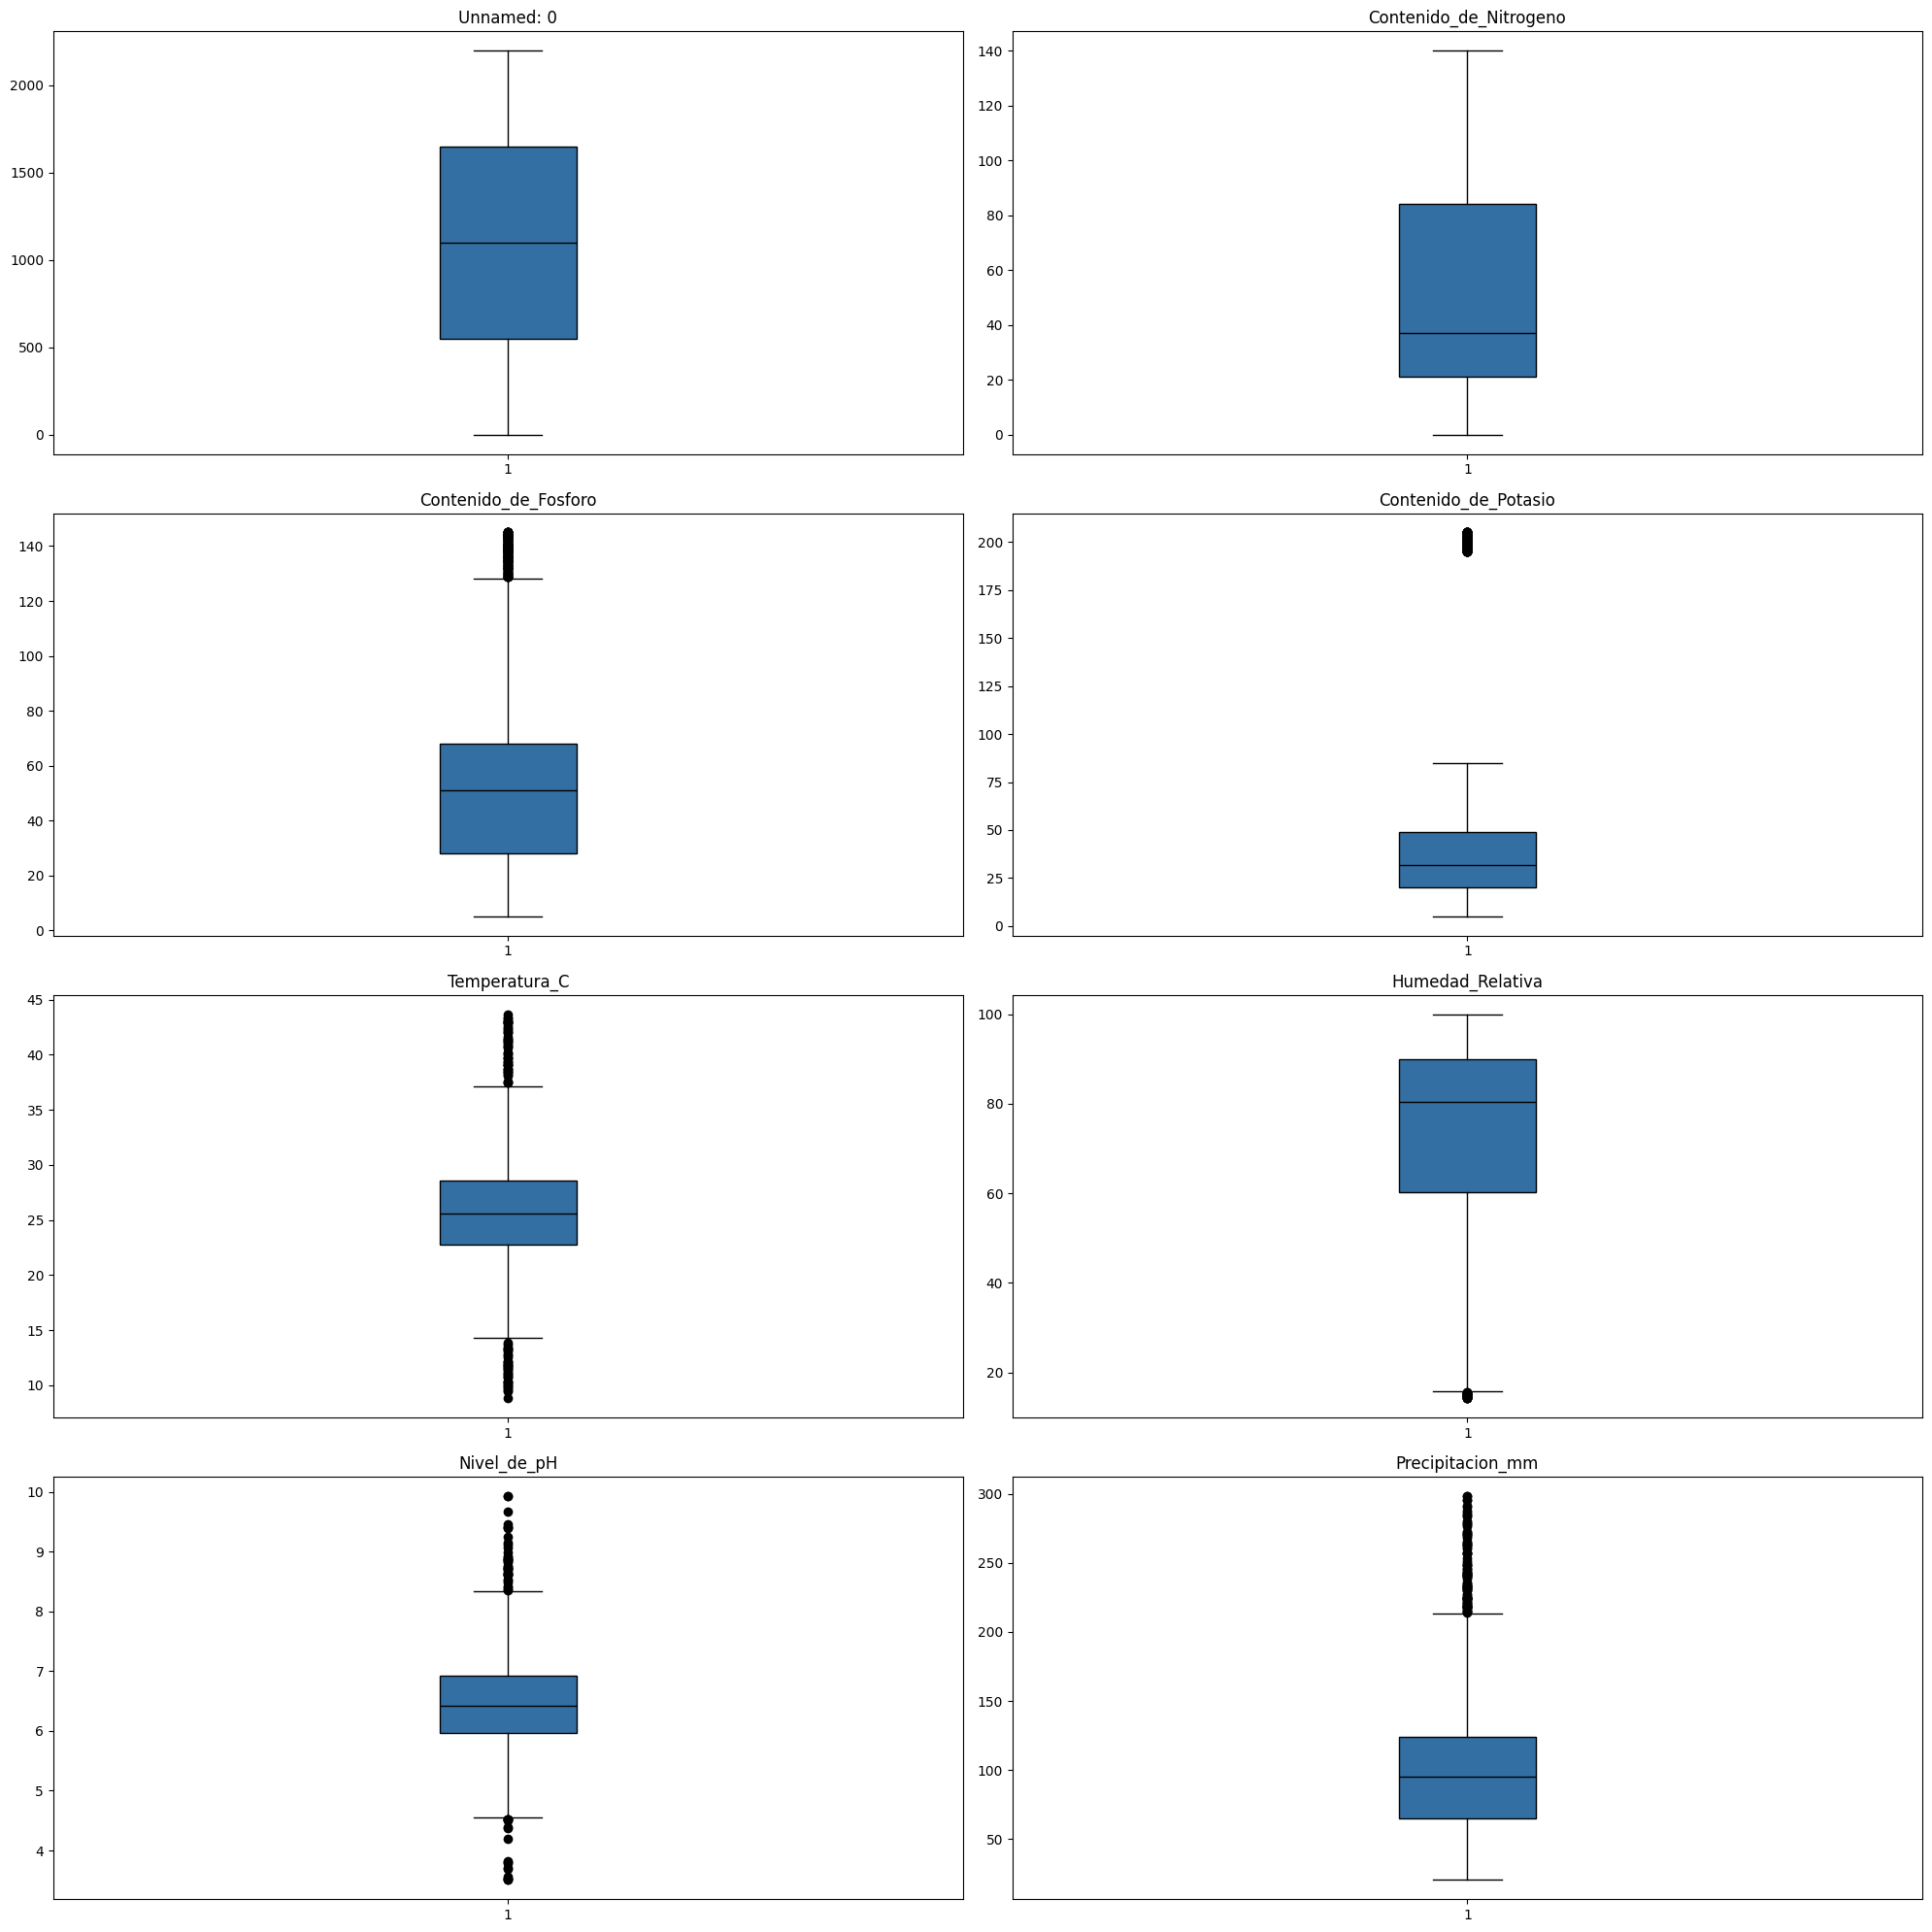

In [25]:
from funciones.exploratory_data_analysis import plot_outliers
plot_outliers(df_cultivos)

### Se puede observar que en este dataset de cultivos no hay datos outliers debido a que las variables pueden ir cambiando en el tiempo y en base al cultivo que se este realizando.

In [26]:
"""
from funciones.exploratory_data_analysis import is_outlier

outliers_fosforo = is_outlier(df_cultivos["Contenido_de_Fosforo"], 1.5)
outlier_values_fosforo = df_cultivos["Contenido_de_Fosforo"][outliers_fosforo]

outliers_potasio = is_outlier(df_cultivos["Contenido_de_Potasio"], 1.5)
outlier_values_potasio = df_cultivos["Contenido_de_Potasio"][outliers_potasio]

outliers_temperatura = is_outlier(df_cultivos["Temperatura_C"], 1.5)
outlier_values_temperatura= df_cultivos["Temperatura_C"][outliers_temperatura]

outliers_humedad = is_outlier(df_cultivos["Humedad_Relativa"], 1.5)
outlier_values_humedad= df_cultivos["Humedad_Relativa"][outliers_humedad]

outliers_nivel_ph = is_outlier(df_cultivos["Nivel_de_pH"], 1.5)
outlier_values_nivel_ph = df_cultivos["Nivel_de_pH"][outliers_nivel_ph]

outliers_precipitacion = is_outlier(df_cultivos["Precipitacion_mm"], 1.5)
outlier_values_precipitacion = df_cultivos["Precipitacion_mm"][outliers_precipitacion]


print("Outliers de Contenido_de_Fosforo:")
print(outlier_values_fosforo)
print("")
print("Outliers de Contenido_de_Potasio:")
print(outlier_values_potasio)
print("")
print("Outliers de Temperatura_C:")
print(outlier_values_temperatura)
print("")
print("Outliers de Humedad_Relativa:")
print(outlier_values_humedad)
print("")
print("Outliers de Nivel_de_pH:")
print(outlier_values_nivel_ph)
print("")
print("Outliers de Precipitacion_mm:")
print(outlier_values_precipitacion)
"""

'\nfrom funciones.exploratory_data_analysis import is_outlier\n\noutliers_fosforo = is_outlier(df_cultivos["Contenido_de_Fosforo"], 1.5)\noutlier_values_fosforo = df_cultivos["Contenido_de_Fosforo"][outliers_fosforo]\n\noutliers_potasio = is_outlier(df_cultivos["Contenido_de_Potasio"], 1.5)\noutlier_values_potasio = df_cultivos["Contenido_de_Potasio"][outliers_potasio]\n\noutliers_temperatura = is_outlier(df_cultivos["Temperatura_C"], 1.5)\noutlier_values_temperatura= df_cultivos["Temperatura_C"][outliers_temperatura]\n\noutliers_humedad = is_outlier(df_cultivos["Humedad_Relativa"], 1.5)\noutlier_values_humedad= df_cultivos["Humedad_Relativa"][outliers_humedad]\n\noutliers_nivel_ph = is_outlier(df_cultivos["Nivel_de_pH"], 1.5)\noutlier_values_nivel_ph = df_cultivos["Nivel_de_pH"][outliers_nivel_ph]\n\noutliers_precipitacion = is_outlier(df_cultivos["Precipitacion_mm"], 1.5)\noutlier_values_precipitacion = df_cultivos["Precipitacion_mm"][outliers_precipitacion]\n\n\nprint("Outliers de C

In [27]:
df_cultivos.groupby("Tipo_de_Cultivo").agg({
    "Contenido_de_Fosforo": "mean",
    "Contenido_de_Potasio": "mean",
    "Temperatura_C": "mean"
}).sort_values(by="Contenido_de_Fosforo", ascending=False).reset_index()

,Tipo_de_Cultivo,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C
0,apple,134.22,199.89,22.630942
1,grapes,132.53,200.11,23.849575
2,banana,82.01,50.05,27.376798
3,lentil,68.36,19.41,24.509052
4,chickpea,67.79,79.92,18.872847
5,pigeonpeas,67.73,20.29,27.741762
6,kidneybeans,67.54,20.05,20.115085
7,blackgram,67.47,19.24,29.973340
8,papaya,59.05,50.04,33.723859
9,maize,48.44,19.79,22.389204


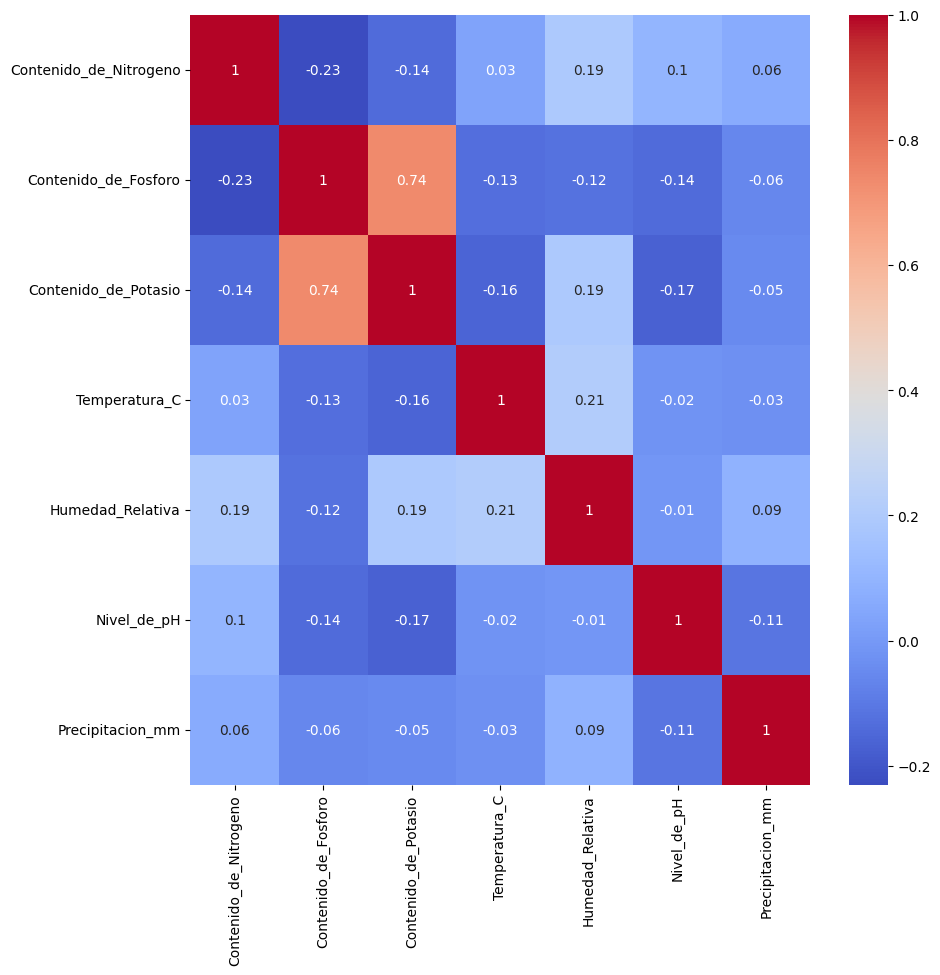

In [28]:
from funciones.machine_learning import crear_heatmap_correlacion
crear_heatmap_correlacion(df_cultivos)